In [1]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-hzpd314h
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-hzpd314h
     |████████████████████████████████| 48.3 MB 1.2 MB/s 
  Created wheel for albumentations: filename=albumentations-1.2.0-py3-none-any.whl size=113435 sha256=98b6b05fc834b19a439f309b2234a3c899389cbaa610c7d48a237e575740bd07
  Stored in directory: /tmp/pip-ephem-wheel-cache-i96slewn/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.6 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [3]:
#License Plate Detection Using TF
"""
  Objective?  Train and test a licene plate detection model and save it for use
  later. Model will be converted to tf lite model to be run on a raspberry pi

  Steps:
    - Get data and prepare it for training. Will be using tensorflow to create
      model. Data will be from Kaggle. A license plate dataset. For preparation,
      the type of model to be used and the necessary augmentations to the data
      has to be known. How tensorflow requires you to set up a directory for the
      data. How the data is loaded into the model and the output of the model.

    - Prepare model. Will be using transfer learning so need to know how that
      works in tensorflow. Need to know how to prepare models in tensorflow for
      training. Task is object detection so output will include annotation or
      bounding box for visualization.

    - Test model. This will be done on a test set after training. Create a test
      for an individual sample and a batch of samples. Need to know how tensorflow
      handles metrics and the loss function to use for this scenario. Why this loss
      function?

    This process will be used to get familiar with the tensorflow library as well
    as gain experience in preparing a model for production.

    Model will then be saved in a directory where its tflite equivalent will be
    created and their performance compared.
"""

'\n  Objective?  Train and test a licene plate detection model and save it for use\n  later. Model will be converted to tf lite model to be run on a raspberry pi\n\n  Steps:\n    - Get data and prepare it for training. Will be using tensorflow to create\n      model. Data will be from Kaggle. A license plate dataset. For preparation,\n      the type of model to be used and the necessary augmentations to the data\n      has to be known. How tensorflow requires you to set up a directory for the\n      data. How the data is loaded into the model and the output of the model.\n\n    - Prepare model. Will be using transfer learning so need to know how that\n      works in tensorflow. Need to know how to prepare models in tensorflow for\n      training. Task is object detection so output will include annotation or\n      bounding box for visualization.\n\n    - Test model. This will be done on a test set after training. Create a test\n      for an individual sample and a batch of samples. Nee

In [4]:
"""
  Csv file of data can be created from annotation file alone. Here we extract the
  information we need, that is the xmin,ymin,xmax and ymax of the bounding box,
  then the image file name and the size of the image, the width and height.
  You'll learn how to handle xml files.

  Then with the csv file we get all the information we need for each image.
  Depending on how tensorflow loads data, we can use whatever approach, be it tfrecords
  to load the said data efficiently
"""

"\n  Csv file of data can be created from annotation file alone. Here we extract the\n  information we need, that is the xmin,ymin,xmax and ymax of the bounding box,\n  then the image file name and the size of the image, the width and height.\n  You'll learn how to handle xml files.\n\n  Then with the csv file we get all the information we need for each image.\n  Depending on how tensorflow loads data, we can use whatever approach, be it tfrecords\n  to load the said data efficiently\n"

# **Preparing data**

**Data can be obtained from https://www.kaggle.com/datasets/andrewmvd/car-plate-detection**

In [5]:
#Data from kaggle so installing kaggle
!pip install -q kaggle

from google.colab import files
#Upload kaggle.json file which holds key to use kaggle api
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

#Changing permissions so only user has full rw access
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [6]:
!pwd

/content


In [7]:
#Need to create directory where we download data and extract it in
import os
data_path = "data"

#Check if directory exists, if not create and download data.
if os.path.isdir(data_path):
  print("Data already downloaded")

else:
  #Making path
  os.mkdir(data_path)
  #Downloading data from kaggle
  !kaggle datasets download andrewmvd/car-plate-detection -p data --unzip

  #Unzip data
  print("Downloaded Successfully!")

 90% 183M/203M [00:03<00:00, 65.0MB/s]
100% 203M/203M [00:03<00:00, 66.0MB/s]
Downloaded Successfully!


**Create csv file From annotations and store it in google drive**

  Csv file will have a img file name, img height,width,xmin,xmax,ymin and ymax for all images.

In [14]:
import xml.etree.ElementTree as et
import numpy as np

In [167]:
#For dealing with xml files, we'll use the xml python library
def xml_info(path):
  #get path to xml file
  #path = "data/annotations/Cars0.xml"
  #get tree representation
  xml_rep = et.parse(path)
  root = xml_rep.getroot()
  #print(et.tostring(root))

  #folder
  folder = root[0].text
  filename = root[1].text
  #print(folder)
  #print(filename)

  #Size
  width = int(root[2][0].text)
  height = int(root[2][1].text)
  depth = int(root[2][2].text)
  #print(f"Size  :  width: {width}, height:{height}, depth:{depth}")

  #Bbox
  xmin = root[4][5][0].text
  ymin = root[4][5][1].text
  xmax = root[4][5][2].text
  ymax = root[4][5][3].text
  #print(f"Bbox  :  xmin: {xmin}, ymin:{ymin}, xmax:{xmax}, ymax:{ymax}")

  return {"folder":folder,
          "filename":filename,
          "width":width,
          "height":height,
          "depth":depth,
          #"bboxes":np.array([[xmin,ymin,xmax,ymax]],dtype=np.float32).reshape((4,)),
          "xmin":float(xmin),
          "ymin":float(ymin),
          "xmax":float(xmax),
          "ymax":float(ymax)}


In [168]:
#looping through annotations
from glob import glob
import pandas as pd


annotations = "data/annotations/*.xml"
#imgs_path = "data/images/*.png"
items = glob(annotations)
#imgs = glob(imgs_path)

data = []
#looping through annotations
for annot in items:
  res = xml_info(annot)
  data.append(res)

#Creating dataframe from data
df = pd.DataFrame(data)
df.head()

,folder,filename,width,height,depth,xmin,ymin,xmax,ymax
0,images,Cars77.png,400,270,3,229.0,151.0,309.0,178.0
1,images,Cars368.png,400,300,3,173.0,173.0,223.0,203.0
2,images,Cars334.png,400,204,3,155.0,146.0,211.0,162.0
3,images,Cars201.png,590,350,3,216.0,171.0,367.0,208.0
4,images,Cars72.png,400,332,3,156.0,182.0,255.0,208.0


In [169]:
df.dtypes

folder       object
filename     object
width         int64
height        int64
depth         int64
xmin        float64
ymin        float64
xmax        float64
ymax        float64
dtype: object

In [57]:
ea = df["bboxes"]
a.shape

(433,)

In [23]:
from PIL import Image,ImageDraw
import numpy as np

In [29]:
##Visualize image
def visualize(image,index=0):
  if type(image) == str:
    im = Image.open(image)
    #print("String")
    #im.show()

  elif type(image) is np.ndarray:
    im = Image.fromarray(image)

  else:
    #if df is passed
    root = "data/images/"
    path = root + image.iloc[index,1]
    xmin = image.loc[index,"xmin"]
    ymin = image.loc[index,"ymin"]
    xmax = image.loc[index,"xmax"]
    ymax = image.loc[index,"ymax"]
    #reading image
    im = Image.open(path)
    img1 = ImageDraw.Draw(im)
    img1.rectangle([(xmin,ymin),(xmax,ymax)],outline="green",width=2)


  return im

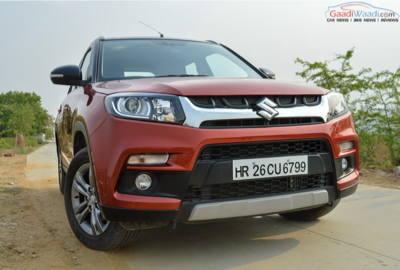

In [30]:
im = visualize("data/images/"+df.iloc[0,1])
im

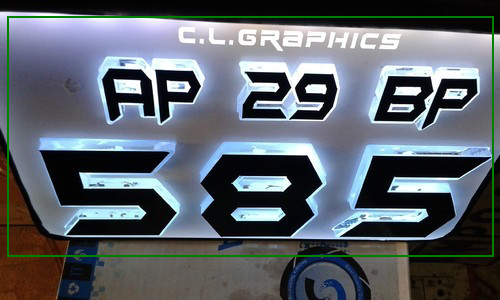

In [31]:
im = visualize(df,index=56)
im

In [45]:
#convert to csv
df_path = "data/lp_det.csv"
df.to_csv(df_path,index=False)

In [33]:
"""
  For converting the data from csv file into an interator for
  tensorflow model to train on,
  1. First we need to splice together the image list and the bbox
  2. The target is the bounding box since we're trying yo predict
    a bounding box.
  3.Load and resize all images and to match, resize all bounding boxes
"""

"\n  For converting the data from csv file into an interator for\n  tensorflow model to train on,\n  1. First we need to splice together the image list and the bbox\n  2. The target is the bounding box since we're trying yo predict\n    a bounding box.\n  3.Load and resize all images and to match, resize all bounding boxes\n"

In [34]:
"""
  Create train val splits and use that to create train val
  datasets.
  Steps:
    - Images are our inputs(X) and the bounding boxes are our outputs(Y)
    - Create our X np arrays and Y arrays, where X contains the image filename,
      and Y the bboxes.(xmin,ymin,xmax,ymax)
    - We create our splits using these X and Y's.
    - The splits are then used to create the respective datasets.

    - Train dataset created using tf pipeline format. Train dataset also undergoes
      an augmentation procedure.
    - Validatation augmentation includes just a size change.
    - Train augmentation may include a stretch, flip(horizontal or vertical),
      Increase in brightness(might not be a good idea).
"""

"\n  Create train val splits and use that to create train val\n  datasets.\n  Steps:\n    - Images are our inputs(X) and the bounding boxes are our outputs(Y)\n    - Create our X np arrays and Y arrays, where X contains the image filename,\n      and Y the bboxes.(xmin,ymin,xmax,ymax)\n    - We create our splits using these X and Y's.\n    - The splits are then used to create the respective datasets.\n\n    - Train dataset created using tf pipeline format. Train dataset also undergoes\n      an augmentation procedure.\n    - Validatation augmentation includes just a size change.\n    - Train augmentation may include a stretch, flip(horizontal or vertical),\n      Increase in brightness(might not be a good idea).\n"

In [58]:
#Creating X and y sets
##X consists of images and y consists of bboxes
bboxs = df.loc[:,["xmin","ymin","xmax","ymax"]].to_numpy().astype(np.float32)
bboxes = df.loc[:,"bboxes"].to_numpy()
print(bboxs.shape)
#print(bboxs)
print(bboxes.shape)
#print(bboxes)

(433, 4)
(433,)


In [59]:
import tensorflow as tf
import albumentations as A
import cv2
from sklearn.model_selection import train_test_split

In [60]:
IMAGE_SIZE = 299

In [123]:
##Function to read in single image
def read_img(image,label):
  root = "data/images/"
  #print(image)
  #print(type(image))
  #image = cv2.imread(root + image)
  #image = cvt.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = tf.io.read_file(root+image)
  image = tf.image.decode_image(image,channels=3,expand_animations = False,dtype=tf.float32)
  image = tf.image.resize(image,[IMAGE_SIZE, IMAGE_SIZE])
  return image,label

"""
,
                    A.AdvancedBlur(p=0.5),
                    A.OneOf([
                             A.HorizontalFlip(p=0.5),
                             A.VerticalFlip(p=0.2)
                    ],p=0.5),
                    A.OneOf([
                             A.Sharpen(p=0.5),
                             A.MotionBlur(blur_limit=3,p=0.5)
                    ])
"""

def train_aug_pipeline():
  return A.Compose([
                    A.Resize(width = IMAGE_SIZE,height=IMAGE_SIZE),
                    A.AdvancedBlur(p=0.5),
                    A.OneOf([
                             A.HorizontalFlip(p=0.5),
                             A.VerticalFlip(p=0.2)
                    ],p=0.5),
                    A.OneOf([
                             A.Sharpen(p=0.5),
                             A.MotionBlur(blur_limit=3,p=0.5)
                    ])
  ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=["labels"]))

def val_aug_pipeline():
  return A.Compose([
                    A.Resize(width = IMAGE_SIZE, height=IMAGE_SIZE)
  ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=["labels"]))

##Training augmentation function
def train_augmentation(image,bbox):
  transform = train_aug_pipeline()
  #print(image)
  #transformed = transform(image = image,bboxes = label)
  labels = np.ones(len(bbox))
  #print(bbox)
  transformed = transform(image = image,bboxes = bbox,labels=labels)
  #image = transformed

  image = transformed["image"].astype(np.float32)
  bbox = np.array(transformed["bboxes"]).astype(np.float32)

  #label = {"xmin":label[0],"ymin":label[1],"xmax":label[2],"ymax":label[3]}
  
  return image,bbox

#def augment_tf(image,label):
  # = tf.image.resize(image,[IMAGE_SIZE, IMAGE_SIZE])

##Validation augmentation function
def val_augmentation(image,bbox):
  transform = val_aug_pipeline()
  labels = np.ones(len(bbox))

  transformed = transform(image = image,bboxes = bbox,labels=labels)
  image = transformed["image"]
  label = transformed["bboxes"]

  #label = {"xmin":label[0],"ymin":label[1],"xmax":label[2],"ymax":label[3]}

  return image,label 

In [127]:
a = np.array([1,2,3])
len(a)

3

In [148]:
rw = df.iloc[0,:]
np.array([rw["xmin":"ymax"].to_numpy(np.float32)])

array([[229., 151., 309., 178.]], dtype=float32)

In [149]:
#Preprocess on whole dataset using albumentations before passing to tf.data
def preprocess(row):
  #takes in row of df and performs operation
  root = "data/images/"
  image = Image.open(root + row["filename"]).convert('RGB')
  image = np.array(image)
  bbox = np.array([row["xmin":"ymax"].to_numpy(np.float32)])
  #print(bbox)
  image,bbox = train_augmentation(image,bbox)
  return image,bbox
  

In [156]:
df["images"] = df.apply(preprocess,axis=1)

In [157]:
df.loc[:,"images"].dtype

dtype('O')

In [160]:
df.loc[0,"images"][0].dtype

dtype('float32')

In [144]:
#df.loc[df.loc[:,"images"].shape == df.loc[0,"images"].shape]

In [178]:
def train_val_ds(df):
  #Perform data aug
  #df["images"], df["bboxes_new"] = zip(*df.apply(preprocess,axis=1))
  #Get X and Y
  #X = df.loc[:,"images"].to_numpy()
  #Y = df.loc[:,"bboxes_new"].to_numpy()
  #print(X.dtype)
  #print(Y.dtype)
  #X = np.asarray(X).astype(np.float32)
  #Y = np.asarray(Y).astype(np.float32)
  #print(X.dtype)
  #print(Y.dtype)
  X = df.loc[:,"filename"].values
  Y = df.loc[:,["xmin","ymin","xmax","ymax"]].values.astype(np.float32)
  print(X.dtype)
  print(Y.dtype)



  #Creating train val splits
  X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size = 0.3,random_state=22)
  #print(X_train,y_train)
  #X = np.asarray(X).astype(np.float32)

  #Creating train and val splits
  train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
  val_ds = tf.data.Dataset.from_tensor_slices((X_val,y_val))
  #print("Train ds")
  #print(train_ds)

  ##Applying reading in and augmentation function to datasets
  #train_ds = train_ds.map(read_img).map(train_augmentation).batch(20)
  #val_ds = val_ds.map(read_img).map(val_augmentation).batch(10)
  train_ds = train_ds.map(read_img).batch(20)
  val_ds = val_ds.map(read_img).batch(10)



  return train_ds,val_ds

**Testing train val datasets**

In [179]:
ts_train,ts_val = train_val_ds(df)
ts_train

object
float32


<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

# **Model Building**

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
#Building model
backbone  = keras.applications.InceptionResNetV2()
backbone.trainable = False

#input
backbone_in = backbone.layers[0].input
backbone_out = backbone.layers[-1].output

#Model Layers
x= layers.Dense(512)(backbone_out)
out = layers.Dense(4)(x)

#Model
model = keras.Model(inputs=backbone_in,outputs=out)

model.compile(
    optimizer = 'adam',
    loss = tfa.losses.GIoULoss(),
    metrics = ["accuracy",tf.keras.metrics.IoU(num_classes=1,target_class_ids=[0])]    
)

225222656/225209952 [==============================] - 8s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
model.fit(ts_train,validation_data=ts_val,epochs=5)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
"""
  - Read on tensorflows different dataloaders and their inputs and ouputs
  - Build dataloader pipeline with augmentation functions
  - Build custom model based on select model's backbone using transfer learning
  - Build custom training loop with tensorflow and read on how gpus are used in tensorflow
  - Save and test model.
  - Start work on vehicle trajectory calculation
"""